## Theory Only Course

### Predicting grade from predicted externals marks (FAT) based on Internals (CAT1, CAT2, DA1, DA2, DA3)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
RFR = RandomForestRegressor(max_depth=5, random_state=0)

In [34]:
# reading the dataset
student_data = pd.read_csv("../Extras/Working CSV files/thelab.csv")
# student_data = student_data.sample(frac=1)

# taking input for class of 70 - for realistic emulation of class grades distribution
test_data = pd.read_csv("../Extras/Working CSV files/testInternals.csv")
student_data.head()

,CAT1,CAT2,DA1,DA2,DA3,FAT,LAB1,LAB2,LAB3,LAB4,LAB5,LAB6,LFAT
0,6,6,7,9,8,34,8,9,8,9,9,10,30
1,5,5,7,9,9,30,10,10,8,8,10,9,32
2,7,6,9,7,9,34,9,8,8,8,9,9,31
3,6,10,10,7,10,49,7,10,7,8,7,8,32
4,9,5,9,8,9,51,7,9,8,9,10,9,32


In [35]:
# extract the required output and input variables
X_train = student_data[['CAT1', 'CAT2', "DA1", "DA2", "DA3"]]
y_train = student_data['FAT']
print(X_train.shape, y_train.shape)

(2000, 5) (2000,)


In [36]:
# fitting the model
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [37]:
# computing the predictions using testing data and comparing the outputs

X_test = test_data[['CAT1', 'CAT2', "DA1", "DA2", "DA3"]]
y_test = test_data['FAT']

y_pred_fat = RFR.predict(X_test)
y_actual = np.array(y_test)

print(np.concatenate((y_pred_fat.reshape(len(y_pred_fat), 1), y_actual.reshape(len(y_actual), 1)),1))

[[48.8230294  31.        ]
 [46.18015633 39.        ]
 [48.56464378 33.        ]
 [47.5149823  47.        ]
 [47.0600105  41.        ]
 [47.28752825 41.        ]
 [46.73267096 53.        ]
 [68.1785747  77.        ]
 [70.44964081 59.        ]
 [67.65970623 69.        ]
 [67.44119297 64.        ]
 [67.32434658 61.        ]
 [68.3824962  69.        ]
 [67.85377889 73.        ]
 [68.24351372 74.        ]
 [67.55200907 60.        ]
 [67.60815826 70.        ]
 [66.76024943 60.        ]
 [66.92303475 68.        ]
 [67.87902208 75.        ]
 [67.10105362 66.        ]
 [67.08783941 67.        ]
 [66.9297663  60.        ]
 [66.73261877 61.        ]
 [67.02634153 67.        ]
 [66.66523168 79.        ]
 [66.88211436 70.        ]
 [66.69064807 78.        ]
 [67.16291083 72.        ]
 [67.28464278 68.        ]
 [67.07693031 74.        ]
 [67.78616095 70.        ]
 [67.16540214 57.        ]
 [67.11130628 59.        ]
 [67.27396063 58.        ]
 [66.85391825 58.        ]
 [67.58348613 59.        ]
 

In [38]:
# training accuracy
RFR.score(X_train, y_train)

0.725112397644103

In [39]:
# testing accuracy
RFR.score(X_test, y_test)

0.736479403234803

In [40]:
# exporting the model
import pickle

pickle.dump(RFR, open('../Models/student-theory.pkl', 'wb'))

In [41]:
internal = np.empty(len(y_pred_fat), dtype=object)
counter = 0

for i in X_test.index:
  internal[counter]=round((15/50)*X_test['CAT1'][i],2) + round((15/50)*X_test['CAT2'][i],2) + X_test['DA1'][i] + X_test['DA2'][i] + X_test['DA3'][i]
  counter += 1

print(internal)
totPred = internal + (0.4)*y_pred_fat

[31.8 27.0 29.4 29.2 30.9 31.5 30.1 37.8 32.6 33.6 36.6 34.7 35.5 36.6
 37.2 36.2 34.8 42.2 38.4 44.7 42.6 43.2 43.2 40.8 39.7 42.1 39.5 42.7
 41.0 41.0 41.2 38.2 40.4 37.2 42.1 41.3 38.5 38.5 47.0 46.3 45.2 47.3
 44.6 48.5 52.4 47.6 49.8 47.3 46.1 45.7 49.4 46.3 47.7 47.2 47.3 49.0
 45.2 43.1 50.9 49.8 49.4 53.6 50.2 54.9 52.2 46.6 51.0 49.1 52.4 54.7]


In [42]:
print(totPred)

[51.32921175825693 45.472062533417784 48.82585751197673 48.205992921837904
 49.72400419902675 50.41501130026923 48.79306838423827 65.07142987999164
 60.77985632573335 60.66388249205544 63.5764771869955 61.62973863132031
 62.852998479888015 63.74151155518677 64.4974054886692 63.220803629427415
 61.84326330537253 68.90409977155716 65.16921390195992 71.8516088338744
 69.44042144995626 70.03513576445359 69.97190651808836 67.49304750809061
 66.51053661187274 68.76609267251035 66.25284574419169 69.37625922708715
 67.86516433263193 67.91385711038077 68.03077212438286 65.3144643816459
 67.26616085531768 64.04452251204543 69.00958425248527 68.0415673004609
 65.5333944502978 65.43804513803133 74.10568506843654 73.64435973902971
 72.46063439336172 74.24556626421294 71.51743479867885 75.95862624872382
 79.64148008623695 74.7566510054223 76.78630333051001 74.39701733721971
 73.18130820438553 72.68402407418647 76.40731904546084 73.23850381571049
 74.594144442814 74.5340442417004 74.41483221576698 75

In [43]:
# computing grades based on y_pred
grade = np.empty(len(y_pred_fat), dtype = object)
Mean=np.mean(totPred)
sd=np.std(totPred)
print("SD:", sd)
print("Mean:", Mean)

for i in range(0,len(totPred)):
  if internal[i] < 30 and y_pred_fat[i] < 40:
    grade[i] = 'F'
  else:
    if totPred[i]>= Mean + 1.5*sd:
      grade[i]='S'
    elif totPred[i]>=Mean + 0.5*sd and totPred[i] < Mean + 1.5*sd:
      grade[i]='A'
    elif totPred[i] >= Mean - 0.5*sd and totPred[i] < Mean + 0.5*sd:
      grade[i]='B'
    elif totPred[i]>= Mean - 1.0*sd and totPred[i] < Mean - 0.5*sd:
      grade[i]='C'
    elif totPred[i] >= Mean - 1.5*sd and totPred[i] < Mean - 1.0*sd:
      grade[i]='D'
    elif totPred[i] >= Mean - 2.0*sd and totPred[i] < Mean - 1.5*sd:
      grade[i]='E'
    elif totPred[i] < Mean - 2.0*sd:
      grade[i]='F'

print(grade)
print(np.unique(grade, return_counts=True))

SD: 10.320517256352298
Mean: 70.11254867042652
['E' 'F' 'F' 'F' 'E' 'E' 'F' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'B' 'B' 'A' 'A' 'A' 'S' 'A' 'S' 'S' 'A' 'S' 'A' 'S' 'S']
(array(['A', 'B', 'C', 'E', 'F', 'S'], dtype=object), array([11, 36, 10,  3,  4,  6], dtype=int64))


## Theory + Lab

### Predicting Grade using internals (DA1, DA2, DA3) and Lab Marks (Internals + Predicted Lab Fat marks)

In [44]:
# reading the dataset
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
theory_lab = pd.read_csv("../Extras/Working CSV files/thelab.csv")
# student_data = student_data.sample(frac=1)

# taking input for class of 70 - for realistic emulation of class grades distribution
theory_lab_test = pd.read_csv("../Extras/Working CSV files/thelabtest.csv")
theory_lab_test.head()

RFR_TL = RandomForestRegressor(max_depth=5, random_state=0)

In [45]:
# extract the required output and input variables
X_train= theory_lab[["LAB1", "LAB2", "LAB3", "LAB4", "LAB5", "LAB6"]]
y_train = theory_lab["LFAT"]
print(X_train.shape, y_train.shape)

(2000, 6) (2000,)


In [46]:
# fitting the model
RFR_TL.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [47]:
pickle.dump(RFR_TL, open('../Models/student-TL.pkl', 'wb'))

In [48]:
# computing the predictions using testing data and comparing the outputs

X_test= theory_lab_test[["LAB1", "LAB2", "LAB3", "LAB4", "LAB5", "LAB6"]]
y_test = theory_lab_test["LFAT"]

y_pred_lab = RFR_TL.predict(X_test)
y_actual = np.array(y_test)

print(np.concatenate((y_pred_lab.reshape(len(y_pred_lab), 1), y_actual.reshape(len(y_actual), 1)),1))

[[34.59470476 32.        ]
 [35.10400167 32.        ]
 [34.79433108 32.        ]
 [34.94525229 31.        ]
 [34.39782332 32.        ]
 [34.96764233 31.        ]
 [34.69237379 32.        ]
 [34.93831162 32.        ]
 [34.97627325 32.        ]
 [35.24902197 30.        ]
 [35.67861924 31.        ]
 [35.06148419 30.        ]
 [35.37774674 31.        ]
 [35.20068036 30.        ]
 [34.97343094 35.        ]
 [34.59544572 36.        ]
 [35.12339374 36.        ]
 [35.1369547  33.        ]
 [34.37501756 36.        ]
 [35.12994006 37.        ]
 [34.02150646 35.        ]
 [34.90563544 35.        ]
 [35.63017974 37.        ]
 [35.44187098 36.        ]
 [34.76453905 37.        ]
 [34.85306609 36.        ]
 [34.61827372 37.        ]
 [35.15685455 35.        ]
 [34.98436896 34.        ]
 [34.83040171 37.        ]
 [34.99832837 34.        ]
 [35.3016673  33.        ]
 [35.12175865 36.        ]
 [35.1399976  35.        ]
 [35.10181845 35.        ]
 [35.24227936 33.        ]
 [35.71370038 36.        ]
 

In [49]:
# training accuracy
print(RFR_TL.score(X_train, y_train))
# accuracy_score(y_test, y_pred)

0.0714087756932793


In [50]:
print(np.sqrt(mean_squared_error(y_actual, y_pred_lab)))
# print(r2_score(y_actual, y_pred_lab))

2.6892556761973814


In [51]:
print(RFR_TL.score(X_test, y_test))

0.015658708074686944


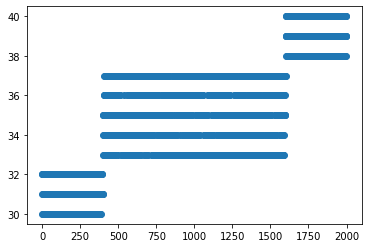

In [52]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0,len(y_train)), y_train)

In [53]:
#Theory+Lab

# thetot=internal+(0.4*fat)
labtot= X_test.sum(axis=1) + y_pred_lab
tot=(0.75*totPred)+(0.25*labtot)
Mean=np.mean(tot)
sd=np.std(tot)
grade = np.empty(len(y_pred_lab), dtype=object)
for i in range(0,len(y_pred_lab)):
  if y_pred_fat[i]<40 or tot[i]<50:
    grade[i]='F'
  else:
    if tot[i]>= Mean + 1.5*sd:
      grade[i]='S'
    elif tot[i]>=Mean + 0.5*sd and tot[i] < Mean + 1.5*sd:
      grade[i]='A'
    elif tot[i] >= Mean - 0.5*sd and tot[i] < Mean + 0.5*sd:
      grade[i]='B'
    elif tot[i ]>= Mean - 1.0*sd and tot[i] < Mean - 0.5*sd:
      grade[i]='C'
    elif tot[i] >= Mean - 1.5*sd and tot[i] < Mean - 1.0*sd:
      grade[i]='D'
    elif tot[i] >= Mean - 2.0*sd and tot[i] < Mean - 1.5*sd:
      grade[i]='E'
    elif tot[i] < Mean - 2.0*sd:
      grade[i]='F'

print(grade)
print(np.unique(grade, return_counts=True))

['E' 'F' 'E' 'F' 'F' 'E' 'F' 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'B'
 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'B' 'B' 'A' 'A' 'A' 'S' 'A' 'S' 'S' 'A' 'A' 'A' 'S' 'S']
(array(['A', 'B', 'C', 'E', 'F', 'S'], dtype=object), array([12, 36, 10,  3,  4,  5], dtype=int64))


## Theory + Lab + J Comp

### Predicting Grade using internals (DA1, DA2, DA3) and Lab Marks (Internals + Predicted Lab Fat marks)

In [54]:
# reading the dataset
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
theory_lab_j = pd.read_csv("../Extras/Working CSV files/TLJ.csv")
# student_data = student_data.sample(frac=1)

# taking input for class of 70 - for realistic emulation of class grades distribution
theory_lab_j_test = pd.read_csv("../Extras/Working CSV files/TLJtest.csv")
theory_lab_j_test.head()
RFR_TLJ = RandomForestRegressor(max_depth=5, random_state=0)

In [55]:
# extract the required output and input variables
X_train= theory_lab_j[["REV1", "REV2"]]
y_train = theory_lab_j["REV3"]
print(X_train.shape, y_train.shape)

(2000, 2) (2000,)


In [56]:
# fitting the model
RFR_TLJ.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [57]:
pickle.dump(RFR_TLJ, open('../Models/student-TLJ.pkl', 'wb'))

In [58]:
# computing the predictions using testing data and comparing the outputs

X_test= theory_lab_j_test[["REV1", "REV2"]]
y_test = theory_lab_j_test["REV3"]

y_pred_J = RFR_TLJ.predict(X_test)
y_actual = np.array(y_test)

print(np.concatenate((y_pred_J.reshape(len(y_pred_J), 1), y_actual.reshape(len(y_actual), 1)),1))

[[46.99437631 45.        ]
 [47.13008905 43.        ]
 [47.29890057 43.        ]
 [47.12639243 46.        ]
 [46.99437631 43.        ]
 [46.99437631 44.        ]
 [47.13992955 44.        ]
 [46.99437631 48.        ]
 [47.36632732 47.        ]
 [46.94432586 48.        ]
 [47.43766657 48.        ]
 [47.27567769 48.        ]
 [47.27962489 47.        ]
 [47.15141732 47.        ]
 [47.09022779 47.        ]
 [47.13058128 47.        ]
 [47.10353893 48.        ]
 [46.99437631 48.        ]
 [47.19147352 48.        ]
 [47.50306206 47.        ]
 [47.2438549  48.        ]
 [47.11359799 47.        ]
 [47.13058128 47.        ]
 [47.27567769 48.        ]
 [47.07278924 48.        ]
 [47.18013998 47.        ]
 [47.2476624  48.        ]
 [47.38749321 48.        ]
 [47.27567769 48.        ]
 [47.13992955 48.        ]
 [47.43766657 48.        ]
 [47.27567769 48.        ]
 [47.12072342 47.        ]
 [47.31218351 47.        ]
 [47.28454811 48.        ]
 [47.27283142 48.        ]
 [47.13992955 48.        ]
 

In [59]:
# training accuracy
print(RFR_TLJ.score(X_train, y_train))
# accuracy_score(y_test, y_pred)

0.014715164206335896


In [60]:
print(np.sqrt(mean_squared_error(y_actual, y_pred_J)))
# print(r2_score(y_actual, y_pred_lab))

1.1912452618574385


In [61]:
print(RFR_TLJ.score(X_test, y_test))

0.042887840041403


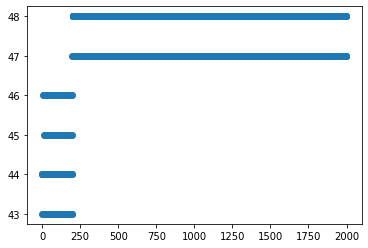

In [62]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0,len(y_train)), y_train)

In [63]:
print(len(y_pred_J))

70


In [64]:
#Theory+Lab+J

# thetot=internal+(0.4*fat)
# labtot= X_test.sum(axis=1) + y_pred_lab
jcomp = X_test.sum(axis=1) + y_pred_J
tot=(0.5*totPred)+(0.25*labtot)+(0.25*jcomp)
Mean=np.mean(tot)
sd=np.std(tot)
grade = np.empty(len(y_pred_J), dtype=object)
for i in range(0,len(y_pred_J)):
  if y_pred_fat[i]<40 or tot[i]<50:
    grade[i]='F'
  else:
    if tot[i]>= Mean + 1.5*sd:
      grade[i]='S'
    elif tot[i]>=Mean + 0.5*sd and tot[i] < Mean + 1.5*sd:
      grade[i]='A'
    elif tot[i] >= Mean - 0.5*sd and tot[i] < Mean + 0.5*sd:
      grade[i]='B'
    elif tot[i ]>= Mean - 1.0*sd and tot[i] < Mean - 0.5*sd:
      grade[i]='C'
    elif tot[i] >= Mean - 1.5*sd and tot[i] < Mean - 1.0*sd:
      grade[i]='D'
    elif tot[i] >= Mean - 2.0*sd and tot[i] < Mean - 1.5*sd:
      grade[i]='E'
    elif tot[i] < Mean - 2.0*sd:
      grade[i]='F'

print(grade)
print(np.unique(grade, return_counts=True))

['E' 'F' 'E' 'E' 'E' 'E' 'F' 'B' 'D' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'B'
 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'B' 'B' 'B' 'S' 'A' 'A' 'A' 'S' 'S' 'A' 'S' 'A' 'S' 'S']
(array(['A', 'B', 'C', 'D', 'E', 'F', 'S'], dtype=object), array([12, 34, 10,  1,  5,  2,  6], dtype=int64))
